<a href="https://colab.research.google.com/github/Lucia1009/TFG-Red-neuronal-turbinas-eolicas/blob/desarrollo/Analisis_viento_potencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Gráficas de representación de la potencia generada por el parque frente al viento para cada dirección


In [ ]:
!pip install dash

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import plotly.graph_objects as go

### Tratamiento de datos

In [ ]:
df=pd.read_csv('elvalle_reparto_saltos_sp75.csv', delimiter=";",decimal=".",skiprows = [1])

In [ ]:
df_filtrado=df[(df['TIME'] % 600==540)]
print(df_filtrado.shape)
print(df.shape)

for col in df_filtrado:
    print("\n",col, "\n", df_filtrado[col].unique())

(21600, 150)
(216000, 150)

 TIME 
 [     540     1140     1740 ... 12958740 12959340 12959940]

 TC1.T.Pg.signal[1] 
 [-7.23160006e-029  2.45985037e-042  1.68092249e-059 ... -1.17359672e-122
 -1.41680844e-134  1.93146925e-148]

 TC2.T.Pg.signal[1] 
 [-5.55890468e-029  1.89087804e-042  1.29211901e-059 ...  1.15310843e-154
  1.39207424e-166 -1.89775026e-180]

 TC3.T.Pg.signal[1] 
 [-5.55890468e-029  1.89087804e-042  1.29211901e-059 ... -2.55237331e-098
 -3.08131745e-110  4.20061720e-124]

 TC4.T.Pg.signal[1] 
 [-5.55890468e-29  1.89087804e-42  1.29211901e-59 ...  6.19753520e-59
  7.48188880e-71 -1.01997121e-84]

 TC5.T.Pg.signal[1] 
 [-5.55890468e-029  1.89087804e-042  1.29211901e-059 ... -7.15127858e-115
 -8.63328234e-127  1.17693535e-140]

 TC6.T.Pg.signal[1] 
 [-5.55890468e-029  1.89087804e-042  1.29211901e-059 ...  1.15310843e-154
  1.39207424e-166 -1.89775026e-180]

 TC7.T.Pg.signal[1] 
 [-5.55890468e-29  1.89087804e-42  1.29211901e-59 ...  1.02719523e-66
  1.24006726e-78 -1.690526

In [ ]:
# plt.title("Dirección viento vs tiempo filtrado")
# plt.scatter(df_filtrado['TIME'], df_filtrado['wd'], color="blue")

# # Use unique values of 'wd' after handling NaN for yticks
# plt.yticks(df_filtrado['wd'].unique())
# plt.xlabel("Tiempo")
# plt.ylabel("Viento")
# plt.show()

# plt.title("Dirección viento vs tiempo sin filtrar")
# plt.scatter(df['TIME'], df['wd'], color="blue")

# # Use unique values of 'wd' after handling NaN for yticks
# plt.yticks(df['wd'].unique())
# plt.xlabel("Tiempo")
# plt.ylabel("Viento")
# plt.show()

In [ ]:
# plt.title("velocidad vs tiempo filtrado")
# plt.scatter(df_filtrado['TIME'], df_filtrado['ws'], color="blue")

# # Use unique values of 'wd' after handling NaN for yticks
# # plt.yticks(df_filtrado['ws'].unique())
# plt.xlabel("Tiempo")
# plt.ylabel("Viento")
# plt.show()

# plt.title("Viento vs tiempo sin filtrar")
# plt.scatter(df['TIME'], df['ws'], color="blue")

# # Use unique values of 'wd' after handling NaN for yticks
# # plt.yticks(df['ws'].unique())
# plt.xlabel("Tiempo")
# plt.ylabel("Viento")
# plt.show()

## Potencia (WF_Power) del parque frente al viento(ws)

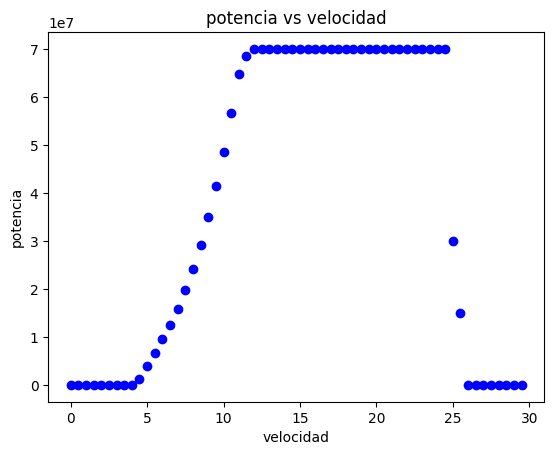

360


In [ ]:
# unique_wd, counts = np.unique(df_filtrado['wd'], return_counts=True)
# print(counts, "\n", unique_wd )

direcciones={}
for i in range(0,360):
    # Separo los datos para cada dirección
    filtered_data = df_filtrado[(df_filtrado['wd'] <= i+0.1) & (df_filtrado['wd'] > (i - 1 + 0.1))]

    # Selecciono solo las columnas que me interesan
    selected_columns = filtered_data[['ws', 'WF_Power', 'wd']]

    direcciones[i]=selected_columns
    # print(i, direcciones[i])

plt.title("potencia vs velocidad")
plt.scatter(direcciones[1]['ws'], direcciones[1]['WF_Power'], color="blue")

plt.xlabel("velocidad")
plt.ylabel("potencia")
plt.show()
print(len(direcciones))

In [ ]:
app = Dash('app1')

app.layout = html.Div([

    html.Div([
        "Input 0: ",
        dcc.Input(id='dir_1', value=0, type='number')
    ]),
    html.Div([
        "Input 1: ",
        dcc.Input(id='dir_2', value=0, type='number')
    ]),
    html.Div([
        "Mostrar gráfica de compraración: ",
        dcc.Checklist(
            id='compara',
            options=[{'label': 'Activar gráfica 2', 'value': 'ver_dir2'}],
            value=[]  # Empieza con la segunda gráfica desactivada
        )
    ]),
    dcc.Graph(id='graph')
])




@app.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('dir_2', 'value'),
    Input('compara', 'value'))
def update_output_div(dir1, dir2, compara):

    # Crear figura base
    fig = go.Figure()

    if dir1 in direcciones:
      fig.add_trace(go.Scatter(x=direcciones[dir1]['ws'], y=direcciones[dir1]['WF_Power'], marker=dict(color='blue')))

    if 'ver_dir2' in compara and dir2 in direcciones:
      fig.add_trace(go.Scatter(x=direcciones[dir2]['ws'], y=direcciones[dir2]['WF_Power'], marker=dict(color='red')))

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Velocidad del viento (ws)',
        yaxis_title='Potencia del parque (WF_Power)'
    )

    return fig


if __name__ == '__main__':
    app.run_server(debug=True, port=8050)


<IPython.core.display.Javascript object>

## Otras gráficas

### Potencia (TC.T.Pg.signal[1]) frente a viento (v[]) para cada turbina

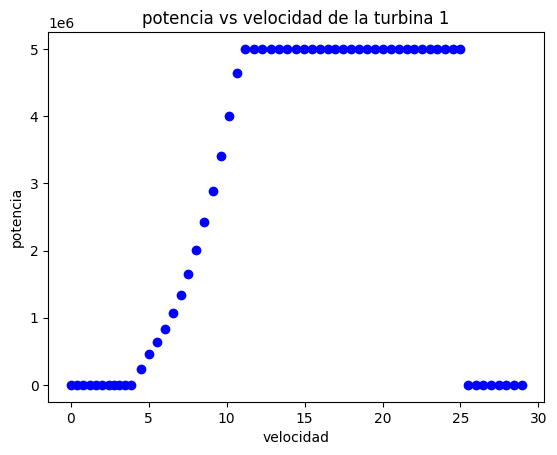

360


In [ ]:
direcciones_2={}
for i in range(0,360):
    # Separo los datos para cada dirección
    filtered_data_2 = df_filtrado[(df_filtrado['wd'] <= i+0.1) & (df_filtrado['wd'] > (i - 1 + 0.1))]

    # Initialize selected_columns as a dictionary for each direction
    selected_columns_2 = {}

    for j in range(1,15):
      # Selecciono solo las columnas que me interesan
      if j<10:
        # Assign the DataFrame to the key 'j' in the selected_columns dictionary
        selected_columns_2[j] = filtered_data_2[['TC'+str(j)+'.T.Pg.signal[1]', 'v[0'+str(j)+']', 'wd']]
      else:
        # Assign the DataFrame to the key 'j' in the selected_columns dictionary
        selected_columns_2[j] = filtered_data_2[['TC'+str(j)+'.T.Pg.signal[1]', 'v['+str(j)+']', 'wd']]

    direcciones_2[i]=selected_columns_2
    # print(i, direcciones_2[i])

plt.title("potencia vs velocidad de la turbina 1")

# Accessing data using dictionary keys
plt.scatter(direcciones_2[1][1]['v[01]'], direcciones_2[1][1]['TC1.T.Pg.signal[1]'], color="blue")

plt.xlabel("velocidad")
plt.ylabel("potencia")
plt.show()
print(len(direcciones_2))

In [ ]:
app2 = Dash('app2')

app2.layout = html.Div([

    html.Div([
        "Input 0: ",
        dcc.Input(id='dir_1', value=0, type='number')
    ]),
    html.Div([
        "Input 1: ",
        dcc.Input(id='dir_2', value=0, type='number')
    ]),
    html.Div([
        "Numero de la turbina 1: ",
        dcc.Input(id='turbina', value=1, type='number')
    ]),
    html.Div([
        "Numero de la turbina 2: ",
        dcc.Input(id='turbina2', value=1, type='number')
    ]),
    html.Div([
        "Mostrar gráfica de compraración: ",
        dcc.Checklist(
            id='compara',
            options=[{'label': 'Activar gráfica 2', 'value': 'ver_dir2'}],
            value=[]  # Empieza con la segunda gráfica desactivada
        ),
         dcc.Checklist(
            id='compara_t',
            options=[{'label': 'Comparar con otra turbina', 'value': 'ver_turb2'}],
            value=[]  # Empieza con la segunda gráfica desactivada
        )
    ]),
    dcc.Graph(id='graph')
])




@app2.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('dir_2', 'value'),
    Input('turbina', 'value'),
    Input('turbina2', 'value'),
    Input('compara', 'value'),
    Input('compara_t', 'value'))
def update_output_div(dir1, dir2, turbina, turbina2, compara, compara_t):

    # Crear figura base
    fig = go.Figure()

    if turbina<10:
      turb='0'+str(turbina)
    else:
      turb=str(turbina)

    if dir1 in direcciones_2:
      fig.add_trace(go.Scatter(x=direcciones_2[dir1][turbina]['v['+turb+']'], y=direcciones_2[dir1][turbina]['TC'+str(turbina)+'.T.Pg.signal[1]'], marker=dict(color='blue')))

    if 'ver_turb2' in compara_t:
      turbina=turbina2
      if turbina2<10:
        turb='0'+str(turbina2)
      else:
        turb=str(turbina2)

    if 'ver_dir2' in compara and dir2 in direcciones_2:
      fig.add_trace(go.Scatter(x=direcciones_2[dir2][turbina]['v['+turb+']'], y=direcciones_2[dir2][turbina]['TC'+str(turbina)+'.T.Pg.signal[1]'], marker=dict(color='red')))

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Viento efectivo (v['+turb+'])',
        yaxis_title='Potencia individual de la turbina (TC'+str(turbina)+'.T.Pg.signal[1])'
    )

    return fig


if __name__ == '__main__':
    app2.run_server(debug=True, port=8050)


<IPython.core.display.Javascript object>

### Ángulo de pitch (TC.beta.signal[1]) frente a la velocidad de viento (v[]) en cada turbina

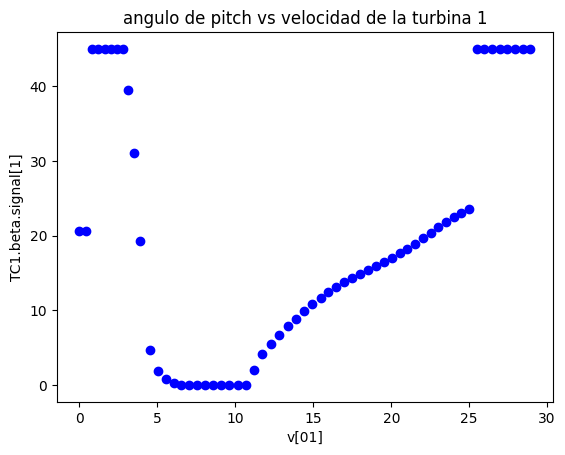

360


In [ ]:
direcciones_3={}
for i in range(0,360):
    # Separo los datos para cada dirección
    filtered_data_3 = df_filtrado[(df_filtrado['wd'] <= i+0.1) & (df_filtrado['wd'] > (i - 1 + 0.1))]

    # Initialize selected_columns as a dictionary for each direction
    selected_columns_3 = {} #Moved initialization outside of loop to allow appending

    for j in range(1,15):
      # Selecciono solo las columnas que me interesan

      if j<10:
        # Assign the DataFrame to the key 'j' in the selected_columns dictionary
        selected_columns_3[j] = filtered_data_3[['TC'+str(j)+'.beta.signal[1]', 'v[0'+str(j)+']', 'wd']]
      else:
        # Assign the DataFrame to the key 'j' in the selected_columns dictionary
        selected_columns_3[j] = filtered_data_3[['TC'+str(j)+'.beta.signal[1]', 'v['+str(j)+']', 'wd']]


    direcciones_3[i]=selected_columns_3
    # print(i, direcciones_3[i])

plt.title("angulo de pitch vs velocidad de viento de la turbina 1")

plt.scatter(direcciones_3[1][1]['v[01]'], direcciones_3[1][1]['TC1.beta.signal[1]'], color="blue")
plt.xlabel('v[01]')
plt.ylabel("TC1.beta.signal[1]")
plt.show()
print(len(direcciones_3))

In [ ]:
app2 = Dash('app2')

app2.layout = html.Div([

    html.Div([
        "Input 0: ",
        dcc.Input(id='dir_1', value=0, type='number')
    ]),
    html.Div([
        "Input 1: ",
        dcc.Input(id='dir_2', value=0, type='number')
    ]),
    html.Div([
        "Numero de la turbina 1: ",
        dcc.Input(id='turbina', value=1, type='number')
    ]),
    html.Div([
        "Numero de la turbina 2: ",
        dcc.Input(id='turbina2', value=1, type='number')
    ]),
    html.Div([
        "Mostrar gráfica de compraración: ",
        dcc.Checklist(
            id='compara',
            options=[{'label': 'Activar gráfica 2', 'value': 'ver_dir2'}],
            value=[]  # Empieza con la segunda gráfica desactivada
        ),
         dcc.Checklist(
            id='compara_t',
            options=[{'label': 'Comparar con otra turbina', 'value': 'ver_turb2'}],
            value=[]  # Empieza con la segunda gráfica desactivada
        )
    ]),
    dcc.Graph(id='graph')
])




@app2.callback(
    Output('graph', 'figure'),
    Input('dir_1', 'value'),
    Input('dir_2', 'value'),
    Input('turbina', 'value'),
    Input('turbina2', 'value'),
    Input('compara', 'value'),
    Input('compara_t', 'value'))
def update_output_div(dir1, dir2, turbina, turbina2, compara, compara_t):

    # Crear figura base
    fig = go.Figure()

    if turbina<10:
      turb='0'+str(turbina)
    else:
      turb=str(turbina)

    if dir1 in direcciones_3:
      fig.add_trace(go.Scatter(x=direcciones_3[dir1][turbina]['v['+turb+']'], y=direcciones_3[dir1][turbina]['TC'+str(turbina)+'.beta.signal[1]'], marker=dict(color='blue')))

    if 'ver_turb2' in compara_t:
      turbina=turbina2
      if turbina2<10:
        turb='0'+str(turbina2)
      else:
        turb=str(turbina2)

    if 'ver_dir2' in compara and dir2 in direcciones_3:
      fig.add_trace(go.Scatter(x=direcciones_3[dir2][turbina]['v['+turb+']'], y=direcciones_3[dir2][turbina]['TC'+str(turbina)+'.beta.signal[1]'], marker=dict(color='red')))

    fig.update_layout(
        transition_duration=10,
        xaxis_title='Viento efectivo (v['+turb+'])',
        yaxis_title='angulo de pitch de la turbina (TC'+str(turbina)+'.beta.signal[1])'
    )

    return fig


if __name__ == '__main__':
    app2.run_server(debug=True, port=8050)


<IPython.core.display.Javascript object>